# Mid-Course Project



### Problem Statement

A multinational retail company decides to embark on a campaign called **'Operation  Increase Sales and Profit' (OISP)** which focuses on increasing the sales of the company and maximising profit. 

Before the management team of the company can take any actionable decision with regards to the campaign,they want to draw the necessary insight from their 'sitting data'.

As their Data Analyst,you are presented with their four year daily sales records (**superstore data.csv**).

#### Task
Analyse the given  data and advise management on what to do to increase sales and profit as intended in the compaign.

Kindly  outlay your analytical steps inline with CRISP-DM(Cross Industry Standard Process for Data Mining)steps, asking the nescessary questions and providing answers based on the data.


Management expects statistical summaries of the key variables considering the aim of the campaign, visualizations and a report on your findings and your advice.

**Use Powerpoint or any other presentation application for your presentation.**

Good Luck !








In [1]:
##Importing the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
#warnings.filterwarnings('ignore')

%matplotlib inline
pd.set_option('display.max_colwidth',None)
pd.set_option('display.max_columns',None)


In [4]:
#Loading the data

data = pd.read_csv('sales_data.csv',parse_dates = ['Order Date'],index_col = 'Unnamed: 0')

In [5]:
data.head()

,Order Date,Order ID,Customer ID,Customer Name,Segment,City,Market,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,2013-01-01,ID-2013-37383,MY-18295,Muhammed Yedwab,Corporate,Albury,APAC,Oceania,Technology,Copiers,"Canon Copy Machine, Digital",1649.214,7,0.1,36.624
1,2013-01-01,IN-2013-47960,JE-15715,Joe Elijah,Consumer,Tianjin,APAC,North Asia,Furniture,Bookcases,"Sauder Floating Shelf Set, Metal",1358.280,7,0.0,203.700
2,2013-01-01,ID-2013-37383,MY-18295,Muhammed Yedwab,Corporate,Albury,APAC,Oceania,Technology,Accessories,"Logitech Memory Card, Erganomic",728.568,8,0.1,-32.472
3,2013-01-01,IN-2013-47960,JE-15715,Joe Elijah,Consumer,Tianjin,APAC,North Asia,Furniture,Bookcases,"Dania Library with Doors, Mobile",2189.520,6,0.0,372.060
4,2013-01-01,IN-2013-47960,JE-15715,Joe Elijah,Consumer,Tianjin,APAC,North Asia,Furniture,Bookcases,"Sauder Floating Shelf Set, Traditional",1362.060,7,0.0,340.410


In [6]:
# checking the number of columns
for col in data.columns:
    print(col)

Order Date
Order ID
Customer ID
Customer Name
Segment
City
Market
Region
Category
Sub-Category
Product Name
Sales
Quantity
Discount
Profit


In [7]:
data.shape

(13799, 15)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13799 entries, 0 to 13798
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order Date     13799 non-null  datetime64[ns]
 1   Order ID       13799 non-null  object        
 2   Customer ID    13799 non-null  object        
 3   Customer Name  13799 non-null  object        
 4   Segment        13799 non-null  object        
 5   City           13799 non-null  object        
 6   Market         13799 non-null  object        
 7   Region         13799 non-null  object        
 8   Category       13799 non-null  object        
 9   Sub-Category   13799 non-null  object        
 10  Product Name   13799 non-null  object        
 11  Sales          13799 non-null  float64       
 12  Quantity       13799 non-null  int64         
 13  Discount       13799 non-null  float64       
 14  Profit         13799 non-null  float64       
dtypes: datetime64[ns](1

In [9]:
#checking for duplicates
data.duplicated().sum()

3

In [11]:
data[data.duplicated(keep =  False)]

,Order Date,Order ID,Customer ID,Customer Name,Segment,City,Market,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2299,2013-06-06,IN-2013-66265,SF-20200,Sarah Foster,Consumer,Newcastle,APAC,Oceania,Office Supplies,Art,"Stanley Pencil Sharpener, Easy-Erase",23.436,1,0.1,9.876
2314,2013-06-06,IN-2013-66265,SF-20200,Sarah Foster,Consumer,Newcastle,APAC,Oceania,Office Supplies,Art,"Stanley Pencil Sharpener, Easy-Erase",23.436,1,0.1,9.876
6095,2013-06-14,ES-2013-2926991,SR-20740,Steven Roelle,Home Office,Madrid,EU,South,Office Supplies,Binders,"Wilson Jones 3-Hole Punch, Economy",83.970,3,0.0,27.630
6098,2013-06-14,ES-2013-2926991,SR-20740,Steven Roelle,Home Office,Madrid,EU,South,Office Supplies,Binders,"Wilson Jones 3-Hole Punch, Economy",83.970,3,0.0,27.630
10021,2013-02-23,KE-2013-2790,PC-9000,Pauline Chand,Home Office,Thika,Africa,Africa,Office Supplies,Envelopes,"Cameo Business Envelopes, Set of 50",20.490,1,0.0,8.190
10023,2013-02-23,KE-2013-2790,PC-9000,Pauline Chand,Home Office,Thika,Africa,Africa,Office Supplies,Envelopes,"Cameo Business Envelopes, Set of 50",20.490,1,0.0,8.190


In [12]:
#Removing Duplicates
data.drop_duplicates(inplace = True)

In [14]:
#checking for duplicates, again
data.duplicated().sum()

0

In [33]:
data.describe()

,Sales,Quantity,Discount,Profit
count,13796.000000,13796.000000,13796.000000,13796.000000
mean,246.855505,3.488765,0.140289,29.493298
std,494.763858,2.280212,0.210067,190.381857
min,0.836000,1.000000,0.000000,-6599.978000
25%,30.825000,2.000000,0.000000,0.000000
50%,85.246000,3.000000,0.000000,9.240000
75%,249.720000,5.000000,0.200000,36.868000
max,17499.950000,14.000000,0.800000,8399.976000


In [34]:
data.describe(include = np.object)

C:\Users\user\AppData\Local\Temp\ipykernel_23708\2743208382.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data.describe(include = np.object)


,Order ID,Customer ID,Customer Name,Segment,City,Market,Region,Category,Sub-Category,Product Name
count,13796,13796,13796,13796,13796,13796,13796,13796,13796,13796
unique,6721,1458,795,3,2195,7,13,3,17,3242
top,IN-2013-42311,PK-19075,Pete Kriz,Consumer,New York City,LATAM,Central,Office Supplies,Binders,Staples
freq,13,37,47,7090,257,3060,3055,8388,1669,49


### Checking individual columns

In [20]:
data['Product Name'].nunique()

3242

In [115]:
data['Product Name'].describe()

count       13796
unique       3242
top       Staples
freq           49
Name: Product Name, dtype: object

In [116]:
data['Category'].describe()

count               13796
unique                  3
top       Office Supplies
freq                 8388
Name: Category, dtype: object

In [28]:
data['Region'].unique()

array(['Oceania', 'North Asia', 'Central', 'North', 'Central Asia',
       'South', 'Africa', 'Canada', 'EMEA', 'Caribbean', 'West', 'East',
       'Southeast Asia'], dtype=object)

In [117]:
data['Region'].describe()

count       13796
unique         13
top       Central
freq         3055
Name: Region, dtype: object

In [31]:
data['City'].nunique()

2195

In [74]:
data['Market'].unique()

array(['APAC', 'EU', 'Africa', 'Canada', 'EMEA', 'LATAM', 'US'],
      dtype=object)

In [118]:
data['Market'].describe()

count     13796
unique        7
top       LATAM
freq       3060
Name: Market, dtype: object

### Exploring the sales column

In [40]:
#Trying to understand the sales and discount and inorder to calculate unit price
data[(data['Product Name'] == 'Stanley Pencil Sharpener, Easy-Erase') & (data['Discount'] >= 0)]

,Order Date,Order ID,Customer ID,Customer Name,Segment,City,Market,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
1821,2013-05-04,SG-2013-6790,BS-1665,Brian Stugart,Consumer,Dakar,Africa,Africa,Office Supplies,Art,"Stanley Pencil Sharpener, Easy-Erase",52.080,2,0.0,17.700
2299,2013-06-06,IN-2013-66265,SF-20200,Sarah Foster,Consumer,Newcastle,APAC,Oceania,Office Supplies,Art,"Stanley Pencil Sharpener, Easy-Erase",23.436,1,0.1,9.876
6111,2013-07-14,ES-2013-1526338,ND-18460,Neil Ducich,Corporate,Herne,EU,Central,Office Supplies,Art,"Stanley Pencil Sharpener, Easy-Erase",182.280,7,0.0,61.950
10542,2013-05-24,US-2013-167129,SC-20050,Sample Company A,Home Office,Tegucigalpa,LATAM,Central,Office Supplies,Art,"Stanley Pencil Sharpener, Easy-Erase",10.416,1,0.4,-0.704
10549,2013-05-24,US-2013-127586,SC-20050,Sample Company A,Home Office,Limoeiro do Norte,LATAM,South,Office Supplies,Art,"Stanley Pencil Sharpener, Easy-Erase",6.944,1,0.6,-4.176


In [53]:
#calculating the original sales without discounts
orig_sales = (1/(1-data['Discount']))*data['Sales']
orig_sales

0        1832.46
1        1358.28
2         809.52
3        2189.52
4        1362.06
          ...   
13794      25.20
13795      20.65
13796       7.98
13797       7.38
13798      13.02
Length: 13796, dtype: float64

In [55]:
#Adding Unit price to the columns
data['Unit Price'] = orig_sales/data['Quantity']

In [65]:
#checking the unique price for one product.

data[(data['Product Name'] == 'Logitech Memory Card, Erganomic') & (data['Discount'] >= 0)]['Unit Price'].unique()

array([101.19,  67.46,  67.46])

In [70]:
#Subseting to compare unit price in the various market and region
view = data[['Order Date','Market','Region', 'Product Name','Unit Price']]
view

,Order Date,Market,Region,Product Name,Unit Price
0,2013-01-01,APAC,Oceania,"Canon Copy Machine, Digital",261.78
1,2013-01-01,APAC,North Asia,"Sauder Floating Shelf Set, Metal",194.04
2,2013-01-01,APAC,Oceania,"Logitech Memory Card, Erganomic",101.19
3,2013-01-01,APAC,North Asia,"Dania Library with Doors, Mobile",364.92
4,2013-01-01,APAC,North Asia,"Sauder Floating Shelf Set, Traditional",194.58
...,...,...,...,...,...
13794,2013-12-31,EMEA,EMEA,"Eldon Light Bulb, Black",25.20
13795,2013-12-31,US,East,Newell 31,4.13
13796,2013-12-31,US,West,Cardinal Hold-It CD Pocket,7.98
13797,2013-12-31,US,East,Avery 487,3.69


In [71]:
view[view['Product Name']=='Canon Copy Machine, Digital']

,Order Date,Market,Region,Product Name,Unit Price
0,2013-01-01,APAC,Oceania,"Canon Copy Machine, Digital",261.78
3818,2013-09-10,APAC,Oceania,"Canon Copy Machine, Digital",261.78
4056,2013-10-05,EU,Central,"Canon Copy Machine, Digital",261.78
10143,2013-07-23,LATAM,Caribbean,"Canon Copy Machine, Digital",174.52
12862,2013-05-29,EU,Central,"Canon Copy Machine, Digital",261.78


In [72]:
view[view['Product Name']=='Sauder Floating Shelf Set, Metal']

,Order Date,Market,Region,Product Name,Unit Price
1,2013-01-01,APAC,North Asia,"Sauder Floating Shelf Set, Metal",194.04
1524,2013-04-10,EU,Central,"Sauder Floating Shelf Set, Metal",194.04
5871,2013-12-13,EU,North,"Sauder Floating Shelf Set, Metal",194.04
7002,2013-08-16,APAC,North Asia,"Sauder Floating Shelf Set, Metal",194.04
7581,2013-10-17,LATAM,Caribbean,"Sauder Floating Shelf Set, Metal",129.36


#### Prices are not the same in all the markets. Why?????

In [88]:
view[view['Product Name']=='Wilson Jones 3-Hole Punch, Economy']

,Order Date,Market,Region,Product Name,Unit Price
2608,2013-06-12,LATAM,Central,"Wilson Jones 3-Hole Punch, Economy",18.66
4422,2013-11-02,EU,South,"Wilson Jones 3-Hole Punch, Economy",27.99
6095,2013-06-14,EU,South,"Wilson Jones 3-Hole Punch, Economy",27.99
6868,2013-02-16,EU,Central,"Wilson Jones 3-Hole Punch, Economy",27.99
6940,2013-05-16,LATAM,North,"Wilson Jones 3-Hole Punch, Economy",18.66
7301,2013-01-17,EU,Central,"Wilson Jones 3-Hole Punch, Economy",27.99
7351,2013-05-17,Africa,Africa,"Wilson Jones 3-Hole Punch, Economy",27.99
9505,2013-11-21,LATAM,Caribbean,"Wilson Jones 3-Hole Punch, Economy",18.66
10262,2013-09-23,APAC,Central Asia,"Wilson Jones 3-Hole Punch, Economy",27.99
10366,2013-11-23,Africa,Africa,"Wilson Jones 3-Hole Punch, Economy",27.99


In [81]:
view1 = view.groupby('Market')[['Product Name','Unit Price']].value_counts()
view1

Market  Product Name                                  Unit Price
APAC    Office Star Rocking Chair, Set of Two         143.16        6
        SAFCO Rocking Chair, Red                      134.91        6
        Brother Personal Copier, High-Speed           141.09        5
        Rubbermaid Stacking Tray, Black               25.20         5
        Stanley Canvas, Water Color                   52.65         5
                                                                   ..
US      12-1/2 Diameter Round Wall Clock              19.98         1
        12 Colored Short Pencils                      2.60          1
        #10- 4 1/8" x 9 1/2" Security-Tint Envelopes  7.64          1
        #10 Self-Seal White Envelopes                 11.09         1
        netTALK DUO VoIP Telephone Service            52.49         1
Length: 8950, dtype: int64

In [89]:
data.describe()

,Sales,Quantity,Discount,Profit,Unit Price
count,13796.000000,13796.000000,13796.000000,13796.000000,13796.000000
mean,246.855505,3.488765,0.140289,29.493298,84.064417
std,494.763858,2.280212,0.210067,190.381857,132.628770
min,0.836000,1.000000,0.000000,-6599.978000,0.990000
25%,30.825000,2.000000,0.000000,0.000000,14.220000
50%,85.246000,3.000000,0.000000,9.240000,34.650000
75%,249.720000,5.000000,0.200000,36.868000,100.080000
max,17499.950000,14.000000,0.800000,8399.976000,3499.990000


<AxesSubplot:>

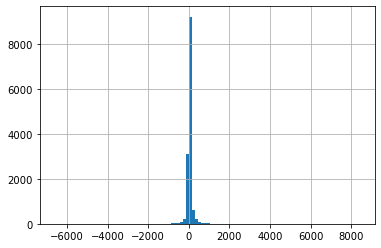

In [102]:
#checking distribution
data['Profit'].hist(bins = 100)

In [109]:
data[data['Profit']==-6599.978]

,Order Date,Order ID,Customer ID,Customer Name,Segment,City,Market,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Unit Price
11713,2013-11-26,CA-2013-108196,CS-12505,Cindy Stewart,Consumer,Lancaster,US,East,Technology,Machines,Cubify CubeX 3D Printer Double Head Print,4499.985,5,0.7,-6599.978,2999.99


{'whiskers': [<matplotlib.lines.Line2D at 0x290b2548070>,
 'caps': [<matplotlib.lines.Line2D at 0x290b2548610>,
 'boxes': [<matplotlib.lines.Line2D at 0x290b2503d60>],
 'medians': [<matplotlib.lines.Line2D at 0x290b2548bb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x290b2548e80>],
 'means': []}

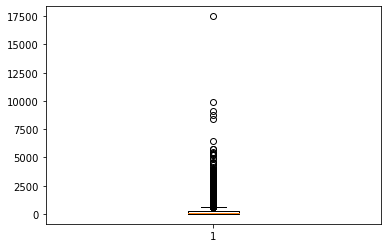

In [112]:
#checking for outliers

plt.boxplot(data['Sales'])

{'whiskers': [<matplotlib.lines.Line2D at 0x290b25e34c0>,
 'caps': [<matplotlib.lines.Line2D at 0x290b25e3a60>,
 'boxes': [<matplotlib.lines.Line2D at 0x290b25e31f0>],
 'medians': [<matplotlib.lines.Line2D at 0x290b25ed040>],
 'fliers': [<matplotlib.lines.Line2D at 0x290b25ed310>],
 'means': []}

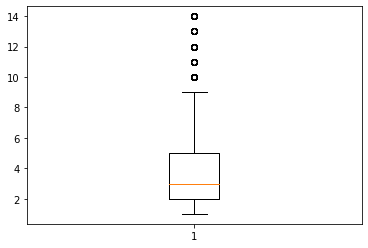

In [114]:
#checking for outliers

plt.boxplot(data['Quantity'])

### Hints on Data preparation and exploration 

1. Load the data.
2. Inspect the data
3. Check for missing values
4. Check the data of each column
5. Check the different categories in the categorical variables
6. Take a view of the data
7. Take the descritive statistics for the numerical variables
9. Check the ditribution of the variables
10. Feature Engineering
#Create columns for:

#Unit price (sale/quantity)

#Year

#Month

#interval between the order date and the shipping date in days.


## Hints on the analysis 

### Check: The following  possible questions may of interest to you.

1. What is the sales and profit per market? 

2. What is the most and least profitable market?

3. How are you going to increase the sales for the products that least bought?

4. Which month does the company records more sales?

5. What is the correlation between discount and sale?

6. Does the shipping cost affect the sales?

7. What is the dominant product category in each market?

8. City with most orders for a given product category?

9. which products are making loss?

10. Which segment provides more profit?

11. what is the correlation between quantity and profit?

12. what it the correlation between shipping cost and profit?

13. Which order priority yields more sales?

14. What is the average shipping cost to each region?

15. What product categories should be targetted to the  different markets?

16. Does the interval between the order date and the shipping date affect sale and profit
